### References
1. https://stackoverflow.com/questions/24920346/filtering-a-wav-file-using-python
2. https://octovoid.com/2017/11/04/coding-a-parametric-equalizer-for-audio-applications/
3. https://stackoverflow.com/questions/54932976/audio-equalizer
4. https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html
5. https://scipy-cookbook.readthedocs.io/items/FIRFilter.html
6. https://www.controlpaths.com/2021/06/28/audio-equalizer-based-on-fir-filters/

### Open and read a wavefile, then write contents to output file
This is a proof of concept for reading/writing wave files, and will likely form the outer shell of the code later

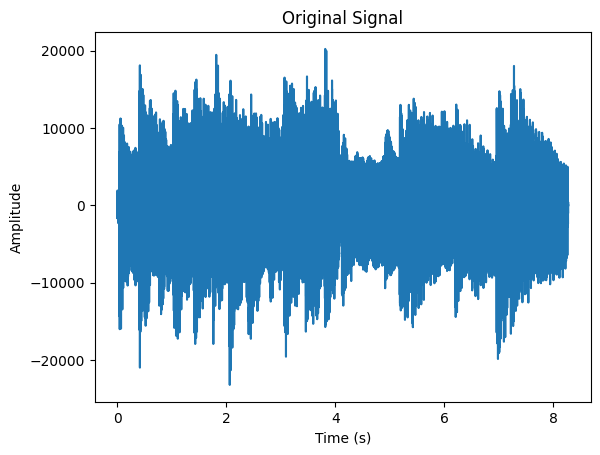

In [68]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

input_file_path = './electric_guitar_sample.wav'

def load_audio(file_path):
    audio_data = wave.open(file_path, 'r')
    return audio_data

def convert_to_numpy_array(signal):
    frame_count = signal.getnframes()
    audio_array = signal.readframes(frame_count)
    audio_array = np.frombuffer(audio_array, dtype='int16')
    return audio_array

def write_to_wav_file(file_path, audio_array, channel_count, sample_width, sample_rate):
    with wave.open(file_path, 'w') as output_file:
        output_file.setnchannels(channel_count)
        output_file.setsampwidth(sample_width)
        output_file.setframerate(sample_rate)
        output_file.writeframes(audio_array.tobytes())

def plot_audio_data(array, signal_framerate, title):
    time = np.linspace(0, len(array) / (signal_framerate * 2), num = len(array))
    
    plt.figure()
    plt.plot(time, array)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.show()

audio_data = load_audio(input_file_path)
audio_array = convert_to_numpy_array(audio_data)

channel_count = audio_data.getnchannels()
sample_width = audio_data.getsampwidth()
sample_rate = 44100
frame_rate = audio_data.getframerate()

plot_audio_data(audio_array, frame_rate, 'Original Signal')

output_file_path = './outputs/test.wav'
write_to_wav_file(output_file_path, audio_array, channel_count, sample_width, sample_rate)

#### Test Signal

In [61]:
from numpy import cos, sin, pi, arange

sample_rate = 20000
nsamples = 
t = arange(nsamples) / sample_rate
x = cos(2*pi*40*t) + 0.2*sin(2*pi*500*t+0.1) + \
        0.2*sin(2*pi*1500*t) + 0.1*sin(2*pi*5000*t + 0.1) + \
            0.1*sin(2*pi*10000*t+.8)

#### Filters

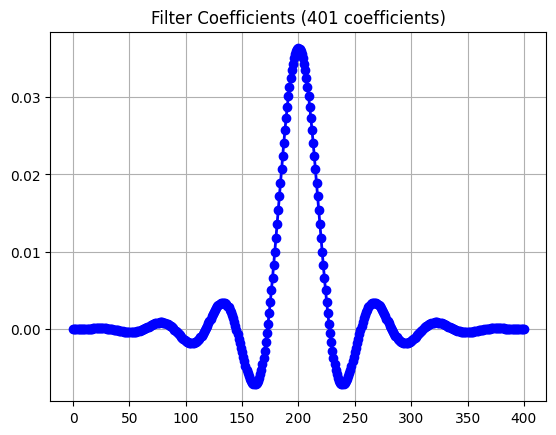

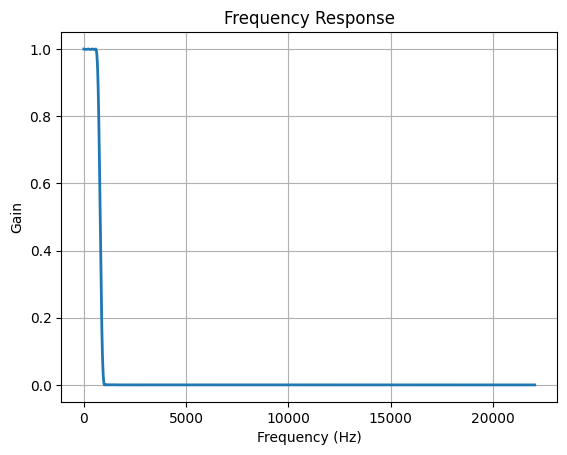

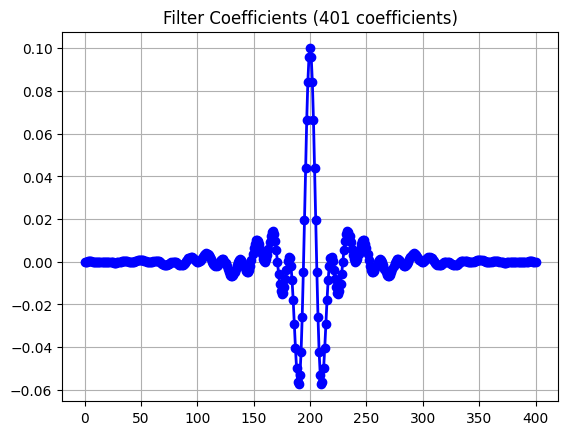

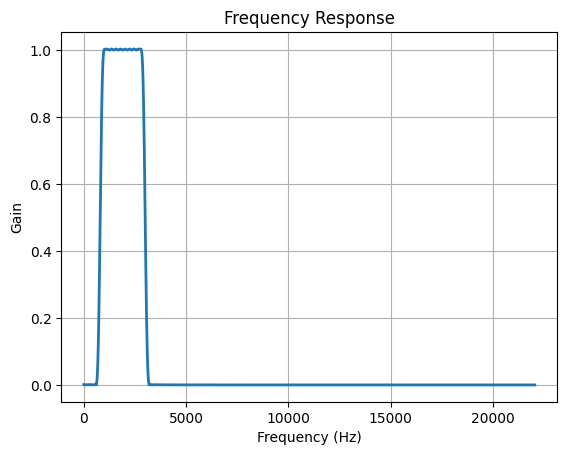

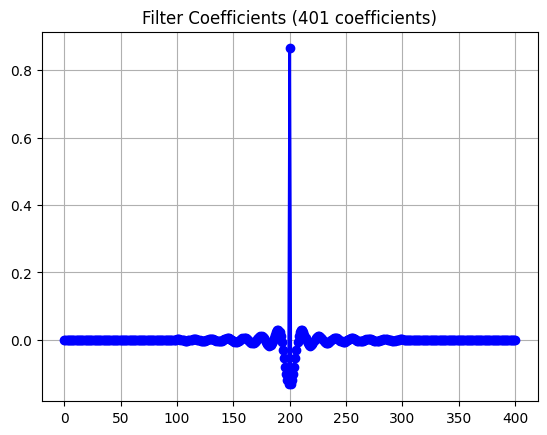

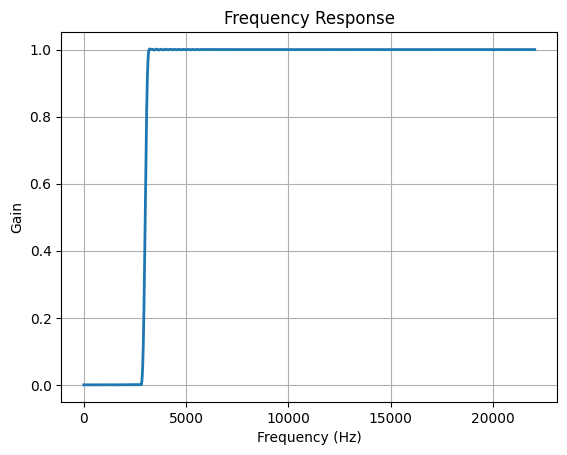

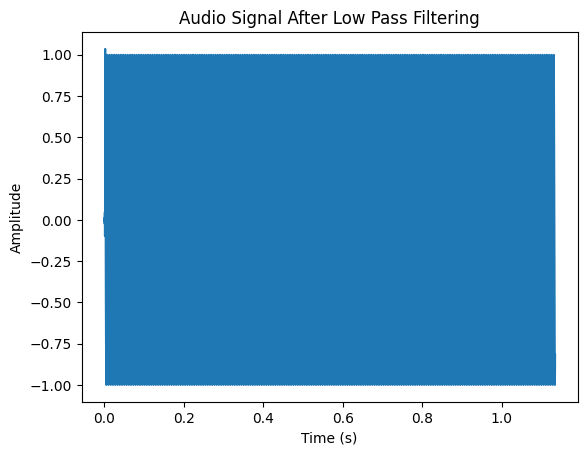

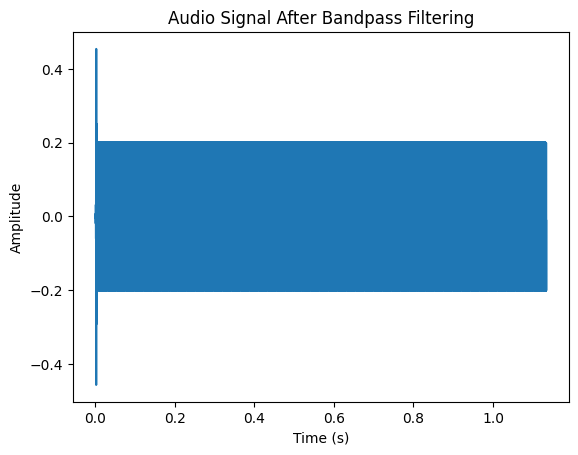

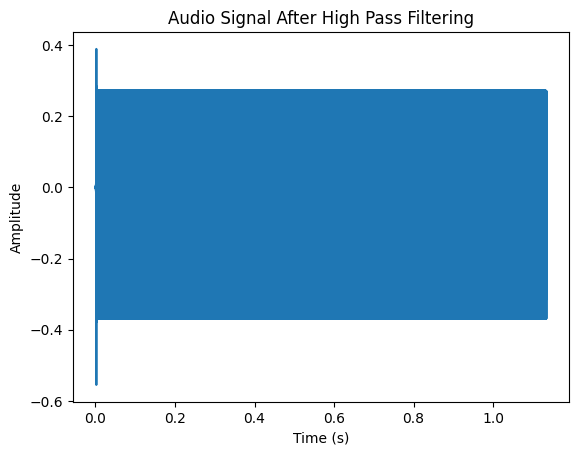

In [73]:
# 3 band equalizer:
# bass: 1Hz - 800Hz
# mid: 800Hz - 3000Hz
# treble: 3000Hz - 8000Hz

from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show

# Create a FIR filter and apply it to x

nyquist_rate = sample_rate / 2.0
transition_width = 400 / nyquist_rate

stop_band_attenuation_dB = 60
low_transition_freq = 800
high_transition_freq = 3000

FIR_order, beta = kaiserord(stop_band_attenuation_dB, transition_width)

lowpass_filter = firwin(FIR_order, low_transition_freq / nyquist_rate, window=('kaiser', beta))
highpass_filter = firwin(FIR_order, high_transition_freq / nyquist_rate, pass_zero=False)
bandpass_filter = firwin(FIR_order, [low_transition_freq / nyquist_rate, high_transition_freq / nyquist_rate], pass_zero=False)

low_freq_signal = lfilter(lowpass_filter, 1.0, x)
mid_freq_signal = lfilter(bandpass_filter, 1.0, x)
high_freq_signal = lfilter(highpass_filter, 1.0, x)


def plot_filter(filter):
    # Plot the coefficients of the filter
    figure()
    plot(filter, 'bo-', linewidth=2)
    title('Filter Coefficients (%d coefficients)' % FIR_order)
    grid(True)

    # Plot the magnitude response of the filter
    figure()
    clf()
    w, h = freqz(filter, worN=8000)
    plot((w/pi)*nyquist_rate, absolute(h), linewidth=2)
    xlabel('Frequency (Hz)')
    ylabel('Gain')
    title('Frequency Response')
    grid(True)

plot_filter(lowpass_filter)
plot_filter(bandpass_filter)
plot_filter(highpass_filter)

plot_audio_data(low_freq_signal, frame_rate, 'Audio Signal After Low Pass Filtering')
plot_audio_data(mid_freq_signal, frame_rate, 'Audio Signal After Bandpass Filtering')
plot_audio_data(high_freq_signal, frame_rate, 'Audio Signal After High Pass Filtering')

output_file_path = './outputs/test.wav'
write_to_wav_file(output_file_path, low_freq_signal, channel_count, sample_width, sample_rate)

#### FFT Implementation for Audio Signal

[-11737   7565 -24447 ... -30200 -22308 -16402]
[ 46964248.        +0.00000000e+00j  14898236.55758122+9.36517657e+07j
  88425035.76186188+5.54675474e+08j ... -94642497.32167195+7.10584623e+08j
  88425035.76186192-5.54675474e+08j  14898236.55758122-9.36517657e+07j]


C:\Users\a01me\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\a01me\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


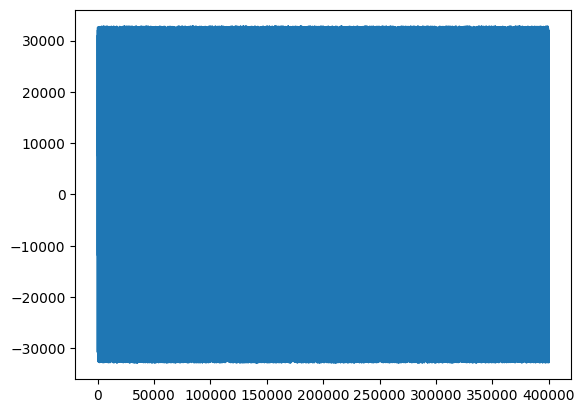

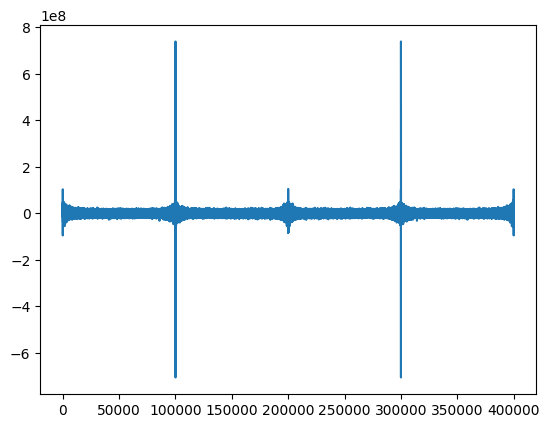

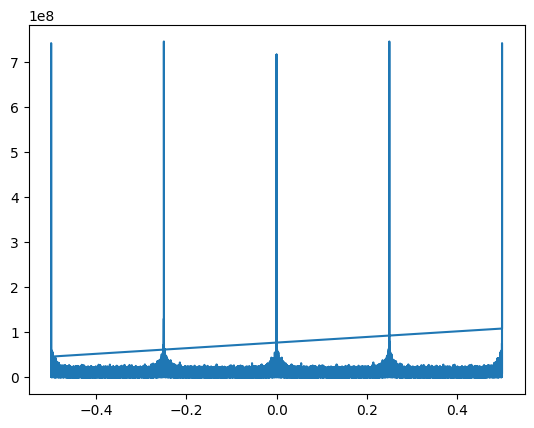

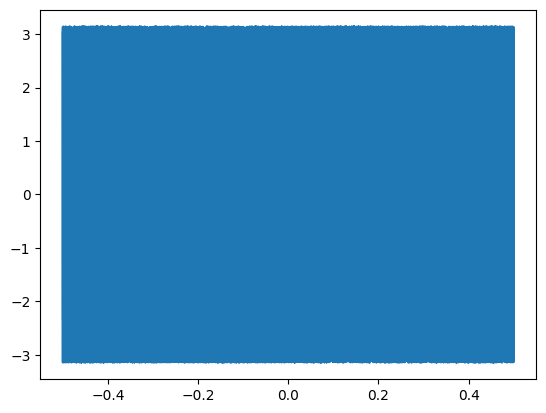

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import wave

def open_plot_file():

    file_path = './outputs/test.wav'

    audio_data = wave.open(file_path, 'r')

    audio_signal = audio_data.readframes(-1)
    audio_signal = np.frombuffer(audio_signal, dtype='int16')
    
    print(audio_signal)

    plt.figure(1)
    plt.plot(audio_signal)

    audio_fft = np.fft.fft(audio_signal)
    audio_freq = np.fft.fftfreq(len(audio_signal))
    
    print(audio_fft)
    
    plt.figure(2)
    plt.plot(audio_fft)
    
    Y    = np.fft.fft(audio_signal)
    freq = np.fft.fftfreq(len(audio_signal))

    plt.figure()
    plt.plot( freq, np.abs(Y) )
    plt.figure()
    plt.plot(freq, np.angle(Y) )
    plt.show()

open_plot_file()

#### Other Method to Plot FFT of Signal

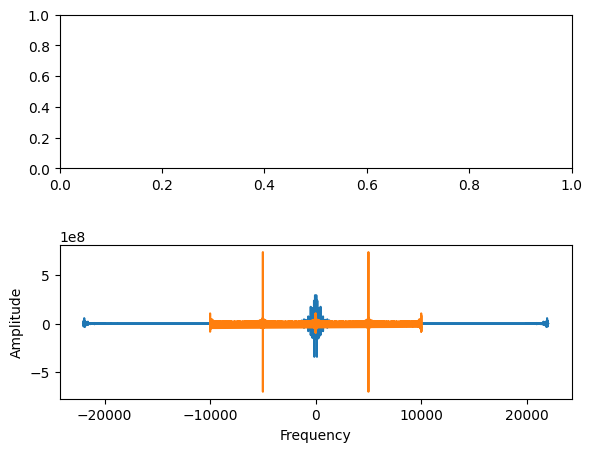

In [58]:
import numpy as np
import wave
import matplotlib.pyplot as plt
import os

def perform_fft(signal, sample_rate):
    # perform the FFT
    fft = np.fft.fft(signal)
    # calculate the frequency bins
    frequency_bins = np.fft.fftfreq(len(signal), 1 / sample_rate)
    return fft, frequency_bins

files = ['electric_guitar_sample.wav', './outputs/test.wav']
files_set = set(files)
#create subplots
fig, files_set = plt.subplots(len(files))

# Open wave file
# iterate through files in audio_samples
for i, file  in enumerate(files):
    wav_file = wave.open('./' + file, 'r')

    # Extract Raw Audio from Wav File
    signal = wav_file.readframes(-1)
    frame_rate = wav_file.getframerate()
    signal = np.frombuffer(signal, dtype='int16')

    fft_out, frequency_bins = perform_fft(signal, frame_rate)

    #plot the fft
    plt.plot(frequency_bins, fft_out)

    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.5, wspace=0.5)
#show all the plots
plt.show()